In [193]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
import random

In [169]:
np.random.seed(0)

In [170]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [171]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [172]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [173]:
num_of_samples=[]

In [174]:
cols = 5
num_classes = 10

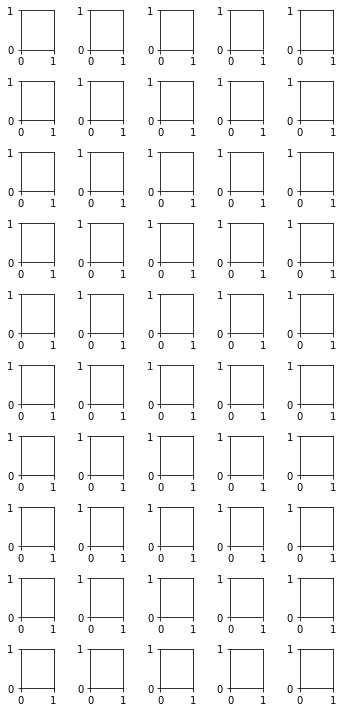

In [175]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()


In [176]:
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


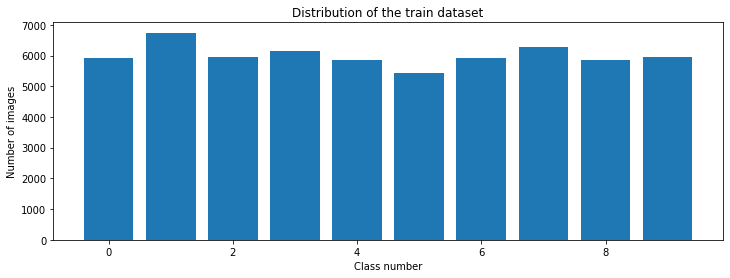

In [177]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [178]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [179]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [180]:
X_train = X_train/255
X_test = X_test/255

In [181]:
#define leNet_model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [182]:
model = leNet_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)              

In [183]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)


Epoch 1/10
135/135 [==============================] - 12s 86ms/step - loss: 0.2181 - accuracy: 0.9309 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 2/10
135/135 [==============================] - 13s 97ms/step - loss: 0.0730 - accuracy: 0.9772 - val_loss: 0.0487 - val_accuracy: 0.9863
Epoch 3/10
135/135 [==============================] - 13s 97ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0493 - val_accuracy: 0.9863
Epoch 4/10
135/135 [==============================] - 11s 81ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0452 - val_accuracy: 0.9872
Epoch 5/10
135/135 [==============================] - 11s 79ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0414 - val_accuracy: 0.9870
Epoch 6/10
135/135 [==============================] - 11s 85ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 7/10
135/135 [==============================] - 12s 88ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0367 - val_accuracy:

Text(0.5, 0, 'epoch')

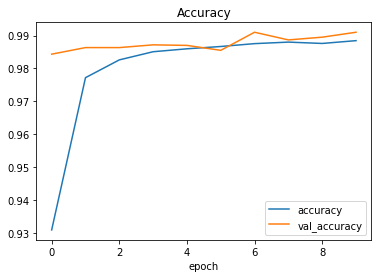

In [184]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

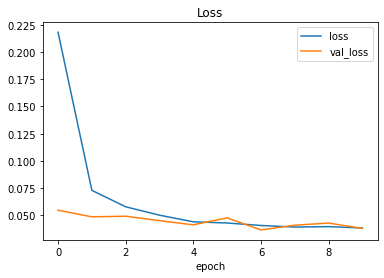

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

<Response [200]>


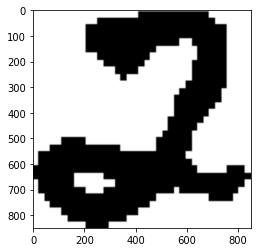

In [192]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose-Sempere-2/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)
(28, 28)


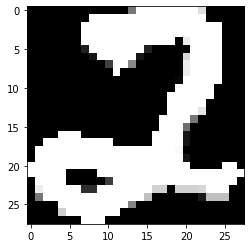

In [187]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
plt.imshow(gray_scale, cmap= plt.get_cmap('gray'))
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap= plt.get_cmap('gray'))

In [188]:
image = image / 255
image = image.reshape(1, 28, 28, 1)
# print(image)

In [189]:
prediction = np.argmax(model.predict(image), axis=-1)
print('Predicted:', str(prediction))

Predicted: [2]


In [190]:
score = model.evaluate(X_test, y_test, verbose=1)
print(type(score))
print('Test Score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9890
<class 'list'>
Test Score: 0.03609095886349678
Test accuracy 0.9890000224113464


In [200]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1 =layer1.predict(img)
visual_layer2 = layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer1.shape)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.PngImagePlugin.PngImageFile'>, <class 'NoneType'>

NameError: name 'visual_layer1' is not defined

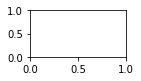

In [199]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

